In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

In [134]:
diamonds = pd.read_csv('diamonds-datamad1019/data.csv/data.csv')

In [135]:
diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698


In [136]:
# Tipos de datos del dataframe
diamonds.dtypes 

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [137]:
# Descripción de las columnas 'object'
diamonds.describe(include=['object'])

,cut,color,clarity
count,40455,40455,40455
unique,5,7,8
top,Ideal,G,SI1
freq,16139,8492,9767


In [138]:
# Zeros
zeros = ((diamonds['x'] == 0).sum()+(diamonds['y'] == 0).sum()+(diamonds['z'] == 0).sum())

In [139]:
# Nulos
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

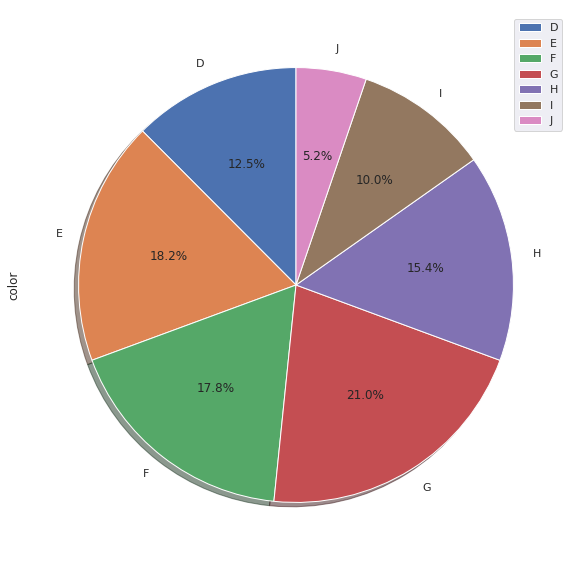

In [140]:
new_df = diamonds.groupby('color').agg({'color': 'count'})
new_df.plot.pie(y='color', figsize=(10, 10), autopct='%1.1f%%', shadow = True, startangle = 90)

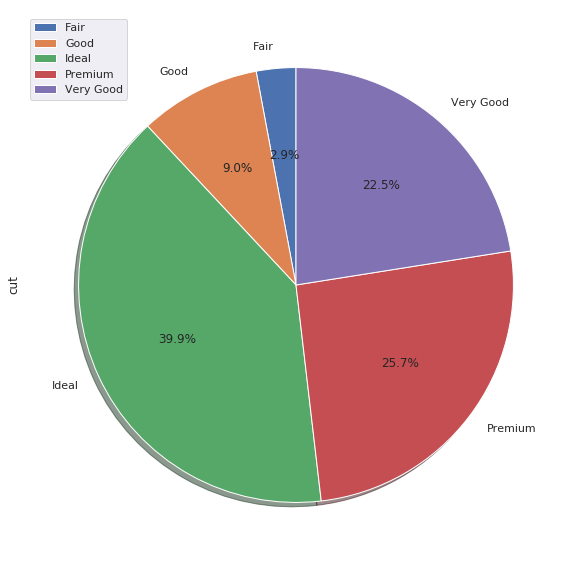

In [141]:
new_df = diamonds.groupby('cut').agg({'cut': 'count'})
new_df.plot.pie(y='cut', figsize=(10, 10), autopct='%1.1f%%', shadow = True, startangle = 90)

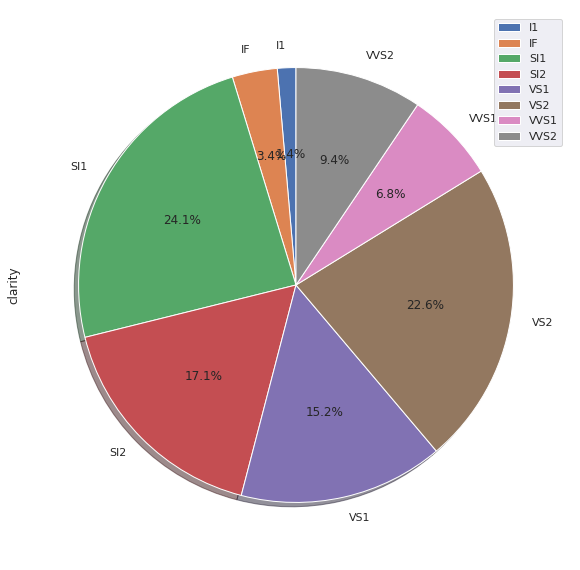

In [142]:
new_df = diamonds.groupby('clarity').agg({'clarity': 'count'})
new_df.plot.pie(y='clarity', figsize=(10, 10), autopct='%1.1f%%', shadow = True, startangle = 90)

In [143]:
diamonds['cut'].unique()

array(['Ideal', 'Very Good', 'Premium', 'Good', 'Fair'], dtype=object)

In [144]:
# Replace values of cut
replace_cut = {'Ideal': 1, 'Premium': 2, 'Very Good': 3, 'Good': 4,'Fair': 5 }
diamonds.replace({"cut": replace_cut}, inplace= True)
replace_color = {'J': 1,'I': 2,'H': 3,'G': 4,'F': 5,'E': 6,'D': 7}
diamonds.replace({"color": replace_color}, inplace= True)
replace_clarity = {'I1': 1, 'SI2': 2, 'SI1': 3 , 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
diamonds.replace({"clarity": replace_clarity}, inplace= True)

In [145]:
diamonds.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.131916,-0.292759,-0.352239,0.024370,0.180861,0.975010,0.944669,0.948835,0.921898
cut,0.131916,1.000000,-0.021126,-0.183393,0.215829,0.434086,0.123010,0.118121,0.145905,0.051159
color,-0.292759,-0.021126,1.000000,-0.027759,-0.048099,-0.026999,-0.271085,-0.262272,-0.268004,-0.174816
clarity,-0.352239,-0.183393,-0.027759,1.000000,-0.067045,-0.158803,-0.371179,-0.355052,-0.364358,-0.146224
depth,0.024370,0.215829,-0.048099,-0.067045,1.000000,-0.296418,-0.028645,-0.032708,0.090617,-0.014383
table,0.180861,0.434086,-0.026999,-0.158803,-0.296418,1.000000,0.195254,0.181997,0.149342,0.125521
x,0.975010,0.123010,-0.271085,-0.371179,-0.028645,0.195254,1.000000,0.967161,0.966188,0.884500
y,0.944669,0.118121,-0.262272,-0.355052,-0.032708,0.181997,0.967161,1.000000,0.941816,0.859138
z,0.948835,0.145905,-0.268004,-0.364358,0.090617,0.149342,0.966188,0.941816,1.000000,0.857643
price,0.921898,0.051159,-0.174816,-0.146224,-0.014383,0.125521,0.884500,0.859138,0.857643,1.000000


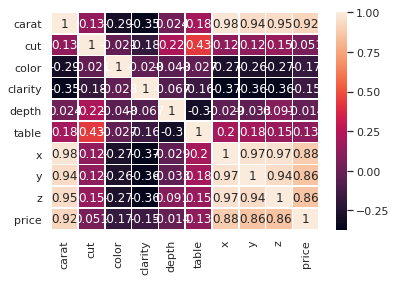

In [146]:
# Correlation Matrix
import seaborn as sns
corr = diamonds.corr()

corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr, linewidths=0.5, annot=True)
corr

In [ ]:
import numpy as np
p = ['carat','table','depth']
xyz = ['x','y','z']
numerics = p + xyz

for col in numerics:
    mean = np.mean(diamonds[col])
    std = np.std(diamonds[col])
    diamonds[col] = (diamonds[col] - mean) / std 

In [177]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop
# Como podemos observar, las features x,y,z tienen una alta correlación, y por lo tanto
# no son discriminativas. Por tanto, podemos eliminarlas.


['x', 'y', 'z']

In [179]:
diamonds.drop(to_drop,axis=1, inplace= True)

In [181]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price
0,3.081321,1,4,2,0.106170,-0.205764,12831
1,3.439708,3,3,2,1.013798,-0.205764,16170
2,0.003405,2,5,2,-0.522188,-0.205764,2797
3,-0.839859,1,5,1,1.083616,1.138849,630
4,-1.029593,1,4,4,-0.103283,-1.102173,698


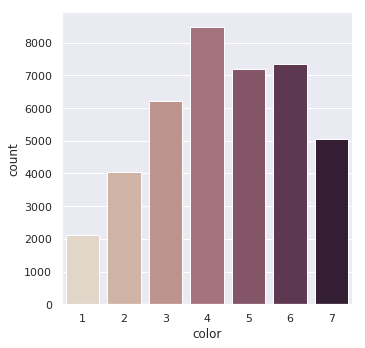

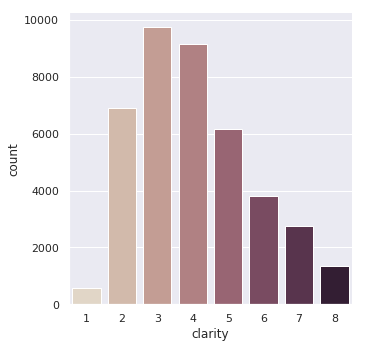

In [148]:
ax = sns.catplot(x="color", kind="count", palette="ch:.25", data=diamonds)
ax = sns.catplot(x="clarity", kind="count", palette="ch:.25", data=diamonds)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


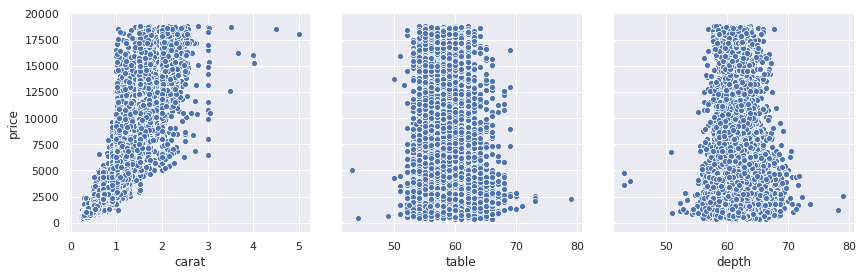

In [149]:
p = ['carat','table','depth']
sns.pairplot(x_vars=p, y_vars=['price'], data=diamonds, size=4.0)

In [152]:
y = diamonds["price"]
X = diamonds[['carat','color','depth', 'table', 'x', 'y', 'z']]

In [153]:
#X = pd.get_dummies(X)



In [154]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


In [155]:
X_train, X_50, y_train, y_50 = train_test_split(X,y, test_size=0.5, random_state=2)

In [156]:
X_valid, X_test, y_valid, y_test = train_test_split(X_50, y_50, test_size=0.5, random_state=2)

In [169]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold
from sklearn.linear_model import Ridge
import sklearn.ensemble as skens

In [184]:
svm = LinearSVC()
lr = LinearRegression()
rid = Ridge()
gb = skens.GradientBoostingRegressor()
rf = skens.RandomForestRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=11)
clf = [lr, rid, gb,rf]
for c in clf:
    scores = cross_val_score(c, X_train, y_train, scoring='r2', cv=kf, n_jobs=2)
    name = str(c)
    print(f'{name}: Average R-Squared Score:', np.mean(scores))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False): Average R-Squared Score: 0.8711275459144707
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001): Average R-Squared Score: 0.871158927882966
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False): Average R-Squared Score: 0.9094

In [ ]:
#d = model.predict(X_test)


#df = pd.DataFrame(d)
#df["gt"] = y_test
#df

# RIDGE

In [188]:
rid = Ridge().fit(X_train, y_train)
y_pred_train = rid.predict(X_train)
y_pred = rid.predict(X_valid)

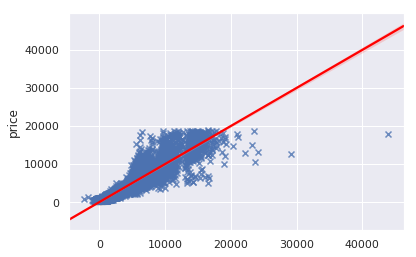

In [189]:
sns.regplot(x=y_pred, y=y_valid, marker='x',line_kws={'color':'red'})

# RANDOM FOREST

In [190]:
rf = skens.RandomForestRegressor(n_estimators=15).fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_valid)

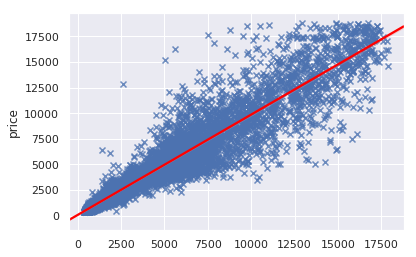

In [191]:
sns.regplot(x=y_pred, y=y_valid, marker='x',line_kws={'color':'red'})